# LIBRAIRIE

In [21]:
import pandas as pd
import numpy as np
import os
import glob
import shutil
import cv2
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import time
import PIL.Image as Image
from tensorflow.keras.datasets import mnist
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds
import PIL
import PIL.Image
import pathlib



In [3]:
data=pd.read_csv("/Users/edouardnadaud/Desktop/DATACAMP_PYTHON_2/Dataset/trainset/trainset.csv") 

In [4]:
a=np.unique(data['label'],return_counts=True)

In [5]:
def Proportion_class(data):
    #librairie de la fonction
#--------------------------------------------------------------------------------------------------------#
    import pandas as pd
    import numpy as np
#--------------------------------------------------------------------------------------------------------#
    #Récuperation des noms et labels associé aux images
    data=data[['filename','label']]
    
    #Proportions des classes
    nbr_class=np.unique(data['label'],return_counts=True)
    
    #nombres de données
    nbr_données=np.sum(nbr_class[1])
        
    #Proportions de chaque classe
    prop_class=[]
    for i in range(len(nbr_class[1])):
        prop_class.append(nbr_class[1][i]/nbr_données)
    
    return(prop_class)
    
    
        
   

In [24]:
train_data_path = "/Users/edouardnadaud/Desktop/DATACAMP_PYTHON_2/datasetcrop/CNN_Classe"
val_data_path = "/Users/edouardnadaud/Desktop/DATACAMP_PYTHON_2/datasetcrop/CNN_CLASS_VAL"
data_dir = pathlib.Path(train_data_path)

## DATA AUGMENTATION

In [28]:
image_count = len(list(data_dir.glob('*/*.png')))

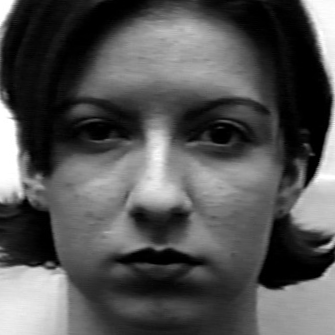

In [41]:
#Affichage de l'émotion0
emotion0 = list(data_dir.glob('0/*'))
PIL.Image.open(str(emotion0[0]))

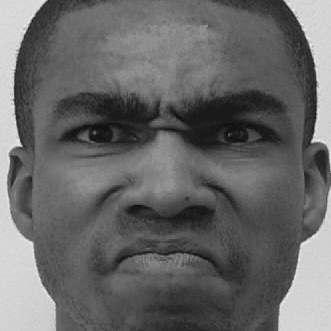

In [30]:
#Affichage de l'émotion1
emotion1 = list(data_dir.glob('1/*'))
PIL.Image.open(str(emotion1[0]))

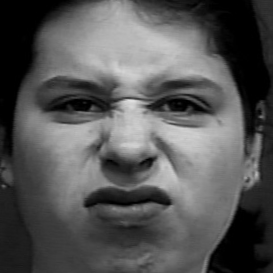

In [33]:
#Affichage de l'émotion3
emotion3 = list(data_dir.glob('3/*'))
PIL.Image.open(str(emotion3[0]))

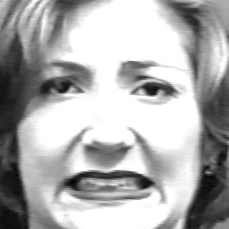

In [34]:
#Affichage de l'émotion4
emotion4 = list(data_dir.glob('4/*'))
PIL.Image.open(str(emotion4[0]))

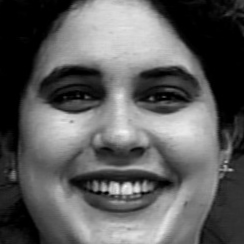

In [36]:
#Affichage de l'émotion5
emotion5 = list(data_dir.glob('5/*'))
PIL.Image.open(str(emotion5[0]))

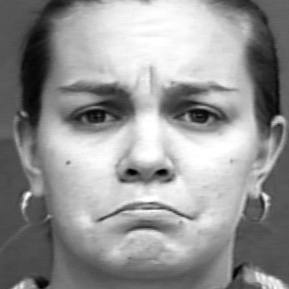

In [37]:
#Affichage de l'émotion6
emotion6 = list(data_dir.glob('6/*'))
PIL.Image.open(str(emotion6[0]))

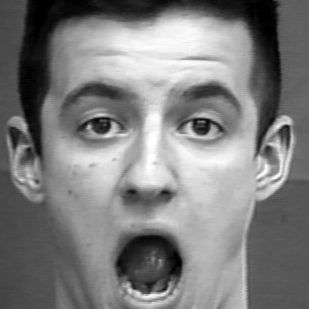

In [38]:
#Affichage de l'émotion7
emotion7 = list(data_dir.glob('7/*'))
PIL.Image.open(str(emotion7[0]))

In [43]:
batch_size=3
img_height = 224
img_width = 224
num_classes = 8

In [53]:
#Augmentation du dataset de train
train_datagen = ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

In [55]:
train_generator = train_datagen.flow_from_directory(
train_data_path,
target_size=(img_height, img_width))

Found 722 images belonging to 7 classes.


In [56]:
aug_iter = train_generator.flow(emotion5[0])

AttributeError: 'DirectoryIterator' object has no attribute 'flow'

In [ ]:
aug_iter = gen.flow(image)

In [47]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'CNN_Classe',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
     as_supervised=True,
)

DatasetNotFoundError: Dataset cnn__classe not found.
Available datasets:
	- abstract_reasoning
	- accentdb
	- aeslc
	- aflw2k3d
	- ag_news_subset
	- ai2_arc
	- ai2_arc_with_ir
	- amazon_us_reviews
	- anli
	- arc
	- bair_robot_pushing_small
	- bccd
	- beans
	- big_patent
	- bigearthnet
	- billsum
	- binarized_mnist
	- binary_alpha_digits
	- blimp
	- bool_q
	- c4
	- caltech101
	- caltech_birds2010
	- caltech_birds2011
	- cars196
	- cassava
	- cats_vs_dogs
	- celeb_a
	- celeb_a_hq
	- cfq
	- cherry_blossoms
	- chexpert
	- cifar10
	- cifar100
	- cifar10_1
	- cifar10_corrupted
	- citrus_leaves
	- cityscapes
	- civil_comments
	- clevr
	- clic
	- clinc_oos
	- cmaterdb
	- cnn_dailymail
	- coco
	- coco_captions
	- coil100
	- colorectal_histology
	- colorectal_histology_large
	- common_voice
	- coqa
	- cos_e
	- cosmos_qa
	- covid19sum
	- crema_d
	- curated_breast_imaging_ddsm
	- cycle_gan
	- dart
	- davis
	- deep_weeds
	- definite_pronoun_resolution
	- dementiabank
	- diabetic_retinopathy_detection
	- div2k
	- dmlab
	- downsampled_imagenet
	- drop
	- dsprites
	- dtd
	- duke_ultrasound
	- e2e_cleaned
	- emnist
	- eraser_multi_rc
	- esnli
	- eurosat
	- fashion_mnist
	- flic
	- flores
	- food101
	- forest_fires
	- fuss
	- gap
	- geirhos_conflict_stimuli
	- genomics_ood
	- german_credit_numeric
	- gigaword
	- glue
	- goemotions
	- gpt3
	- groove
	- gtzan
	- gtzan_music_speech
	- hellaswag
	- higgs
	- horses_or_humans
	- howell
	- i_naturalist2017
	- imagenet2012
	- imagenet2012_corrupted
	- imagenet2012_real
	- imagenet2012_subset
	- imagenet_a
	- imagenet_r
	- imagenet_resized
	- imagenet_v2
	- imagenette
	- imagewang
	- imdb_reviews
	- irc_disentanglement
	- iris
	- kitti
	- kmnist
	- lambada
	- lfw
	- librispeech
	- librispeech_lm
	- libritts
	- ljspeech
	- lm1b
	- lost_and_found
	- lsun
	- lvis
	- malaria
	- math_dataset
	- mctaco
	- mlqa
	- mnist
	- mnist_corrupted
	- movie_lens
	- movie_rationales
	- movielens
	- moving_mnist
	- multi_news
	- multi_nli
	- multi_nli_mismatch
	- natural_questions
	- natural_questions_open
	- newsroom
	- nsynth
	- nyu_depth_v2
	- omniglot
	- open_images_challenge2019_detection
	- open_images_v4
	- openbookqa
	- opinion_abstracts
	- opinosis
	- opus
	- oxford_flowers102
	- oxford_iiit_pet
	- para_crawl
	- patch_camelyon
	- paws_wiki
	- paws_x_wiki
	- pet_finder
	- pg19
	- piqa
	- places365_small
	- plant_leaves
	- plant_village
	- plantae_k
	- qa4mre
	- qasc
	- quac
	- quickdraw_bitmap
	- race
	- radon
	- reddit
	- reddit_disentanglement
	- reddit_tifu
	- resisc45
	- robonet
	- rock_paper_scissors
	- rock_you
	- s3o4d
	- salient_span_wikipedia
	- samsum
	- savee
	- scan
	- scene_parse150
	- scicite
	- scientific_papers
	- sentiment140
	- shapes3d
	- siscore
	- smallnorb
	- snli
	- so2sat
	- speech_commands
	- spoken_digit
	- squad
	- stanford_dogs
	- stanford_online_products
	- starcraft_video
	- stl10
	- story_cloze
	- sun397
	- super_glue
	- svhn_cropped
	- ted_hrlr_translate
	- ted_multi_translate
	- tedlium
	- tf_flowers
	- the300w_lp
	- tiny_shakespeare
	- titanic
	- trec
	- trivia_qa
	- tydi_qa
	- uc_merced
	- ucf101
	- vctk
	- vgg_face2
	- visual_domain_decathlon
	- voc
	- voxceleb
	- voxforge
	- waymo_open_dataset
	- web_nlg
	- web_questions
	- wider_face
	- wiki40b
	- wiki_bio
	- wiki_table_questions
	- wiki_table_text
	- wikihow
	- wikipedia
	- wikipedia_toxicity_subtypes
	- wine_quality
	- winogrande
	- wmt14_translate
	- wmt15_translate
	- wmt16_translate
	- wmt17_translate
	- wmt18_translate
	- wmt19_translate
	- wmt_t2t_translate
	- wmt_translate
	- wordnet
	- wsc273
	- xnli
	- xquad
	- xsum
	- xtreme_pawsx
	- xtreme_xnli
	- yelp_polarity_reviews
	- yes_no

Check that:
    - if dataset was added recently, it may only be available
      in `tfds-nightly`
    - the dataset name is spelled correctly
    - dataset class defines all base class abstract methods
    - the module defining the dataset class is imported


In [7]:

batch_size=3
img_height = 224
img_width = 224
num_classes = 8


train_data = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_path,
  validation_split=0.2,
  subset="training",
  seed=42,
    #je redimensionne les images
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_path,

  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)

Found 722 files belonging to 7 classes.
Using 578 files for training.
Found 722 files belonging to 7 classes.
Using 144 files for validation.
['0', '1', '3', '4', '5', '6', '7']


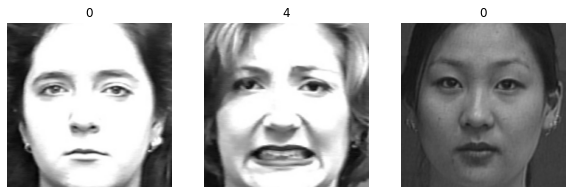

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(3):
        ax = plt.subplot(1, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [44]:
#Import Libraries

import sys
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D,MaxPooling2D, Activation, Dropout, BatchNormalization, Input
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
import itertools  

############################################
# Set the paths for training, testing and validation 
#train_data_path = "/Users/edouardnadaud/Desktop/DATACAMP_PYTHON_2/datasetcrop/CNN_Classe"
#val_data_path = "/Users/edouardnadaud/Desktop/DATACAMP_PYTHON_2/datasetcrop/CNN_CLASS_VAL"
path_train = "/Users/edouardnadaud/Desktop/DATACAMP_PYTHON_2/datasetcrop/CNN_Classe"
path_val= "/Users/edouardnadaud/Desktop/DATACAMP_PYTHON_2/datasetcrop/CNN_Classe_val"
path_test= "/Users/edouardnadaud/Desktop/DATACAMP_PYTHON_2/datasetcrop/CNN_Classe_test"
train_data_path = path
test_data_path = path
valid_data_path =path

############################################
# Set image size and batch size

img_rows = 224
img_cols = 224
batch_size = 3



############################################
# Set Data Generator for training, testing and validataion.
# Note for testing, set shuffle = false (For proper Confusion matrix)

train_datagen = ImageDataGenerator(zoom_range=0.5)
train_generator = train_datagen.flow_from_directory(train_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical', shuffle=True)

valid_datagen = ImageDataGenerator()
valid_generator = valid_datagen.flow_from_directory(valid_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical', shuffle=True)

test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(test_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical', shuffle=False)

#########################################################################
# Function for plots images with labels within jupyter notebook

def plots(ims, figsize=(12,12), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1

    for i in range(len(ims)):
        sp = f.add_subplot(cols, rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=12)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

#########################################################################

#Check the training set (with batch of 10 as defined above
imgs, labels = next(train_generator)

#Images are shown in the output
plots(imgs, titles=labels)

#Images Classes with index
print(train_generator.class_indices)

#Model Creation / Sequential
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255),
                    Conv2D(input_shape=(img_rows,img_cols,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"),
                    Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),
                    MaxPooling2D(pool_size=(2,2),strides=(2,2)),
                    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
                    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"), 
                    MaxPool2D(pool_size=(2,2),strides=(2,2)),
                    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"), 
                    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
                    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
                    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
                    MaxPool2D(pool_size=(2,2),strides=(2,2)),
                    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
                    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
                    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
                    MaxPool2D(pool_size=(2,2),strides=(2,2)),
                    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
                    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
                    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
                    MaxPool2D(pool_size=(2,2),strides=(2,2)),                    

                    Flatten(), 
                    Dense(7, activation='softmax')
                   ])

#Get summary of the model
model.summary()

#Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


class_weight={
    0:0.34,
    1:1.,
    2:0.93,
    3:0.97,
    4:0.97,
    5:0.92,
    6:0.96,
    7:0.9
    
}



#Train the model
history = model.fit(train_generator,
                    steps_per_epoch=50, 
                    validation_data=valid_generator, 
                    validation_steps=17,
                    epochs=25,
                    class_weight=class_weight    
                   )


#Get the accuracy score
test_score = model.evaluate_generator(test_generator, batch_size)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

#Plot the Graph

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
  
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


##################################################################################################
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

##################################################################################################


#Print the Target names

target_names = []
for key in train_generator.class_indices:
    target_names.append(key)

# print(target_names)

#Confution Matrix 

Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

#Print Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

#Save the model
model.save("tutorial.hdf5")



model = load_model('tutorial.hdf5')

file = 'sample.jpg'

img = cv.cvtColor(cv.imread(file),cv.COLOR_BGR2RGB)
img = cv.resize(img, (img_rows,img_cols))

test_image = image.img_to_array(img)
test_image = np.expand_dims(test_image, axis=0)
pred = model.predict(test_image)
print(pred, labels[np.argmax(pred)])





NameError: name 'path' is not defined